# İSMAİL ACAR

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency

# Creating the Dataframe

In [2]:
df_startup = pd.read_csv("StartupData.csv")
df_startup

,#,Startup,Stage,Industry,Company HQ,Incorporated,Type of product,Founder name,Gender,Country based in,Age,Role in the startup
0,1,Startup 1,Development stage,Tourism,Croatia,Yes,Hardware,Founder,Male,Croatia,28.0,Designer
1,2,Startup 2,Pre-seed stage,Maritime,Croatia,Yes,Software & hardware,Founder,Male,Croatia,53.0,CEO
2,3,Startup 3,Idea stage,Education,Canada,No,Service,Founder,Male,Canada,37.0,CEO
3,4,Startup 4,Pre-seed stage,Biotech,Croatia,Yes,Service,Founder,Female,Croatia,43.0,CEO
4,5,Startup 5,Development stage,Gaming,Croatia,No,Service,Founder,Male,Croatia,23.0,Developer
...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Startup 97,Development stage,Energy,Cyprus,No,Software & hardware,Founder,Female,Cyprus,34.0,CTO
114,115,Startup 98,Seed stage,E-commerce,Germany,Yes,Hardware,Founder,Female,Cyprus,38.0,CEO
115,116,Startup 99,Idea stage,Other,Cyprus,No,Service,Founder,NaN,Cyprus,NaN,CEO
116,117,Startup 100,Small Business,Fintech,United Kingdom,Yes,Service,Founder,Male,Cyprus,46.0,Business Developer


# Imputation of Missing Data

In [3]:
imp = SimpleImputer(strategy="most_frequent")
df_startup = pd.DataFrame(imp.fit_transform(df_startup), columns=df_startup.columns, index=df_startup.index)
df_startup

,#,Startup,Stage,Industry,Company HQ,Incorporated,Type of product,Founder name,Gender,Country based in,Age,Role in the startup
0,1,Startup 1,Development stage,Tourism,Croatia,Yes,Hardware,Founder,Male,Croatia,28.0,Designer
1,2,Startup 2,Pre-seed stage,Maritime,Croatia,Yes,Software & hardware,Founder,Male,Croatia,53.0,CEO
2,3,Startup 3,Idea stage,Education,Canada,No,Service,Founder,Male,Canada,37.0,CEO
3,4,Startup 4,Pre-seed stage,Biotech,Croatia,Yes,Service,Founder,Female,Croatia,43.0,CEO
4,5,Startup 5,Development stage,Gaming,Croatia,No,Service,Founder,Male,Croatia,23.0,Developer
...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Startup 97,Development stage,Energy,Cyprus,No,Software & hardware,Founder,Female,Cyprus,34.0,CTO
114,115,Startup 98,Seed stage,E-commerce,Germany,Yes,Hardware,Founder,Female,Cyprus,38.0,CEO
115,116,Startup 99,Idea stage,Other,Cyprus,No,Service,Founder,Male,Cyprus,39.0,CEO
116,117,Startup 100,Small Business,Fintech,United Kingdom,Yes,Service,Founder,Male,Cyprus,46.0,Business Developer


# Questions, Analyzes and Visualizations

In [4]:
#Which stage is represented mostly?

df_startup["Stage"].value_counts()

Development stage    59
Pre-seed stage       17
Seed stage           16
Idea stage           13
Small Business       11
Series A stage        2
Name: Stage, dtype: int64

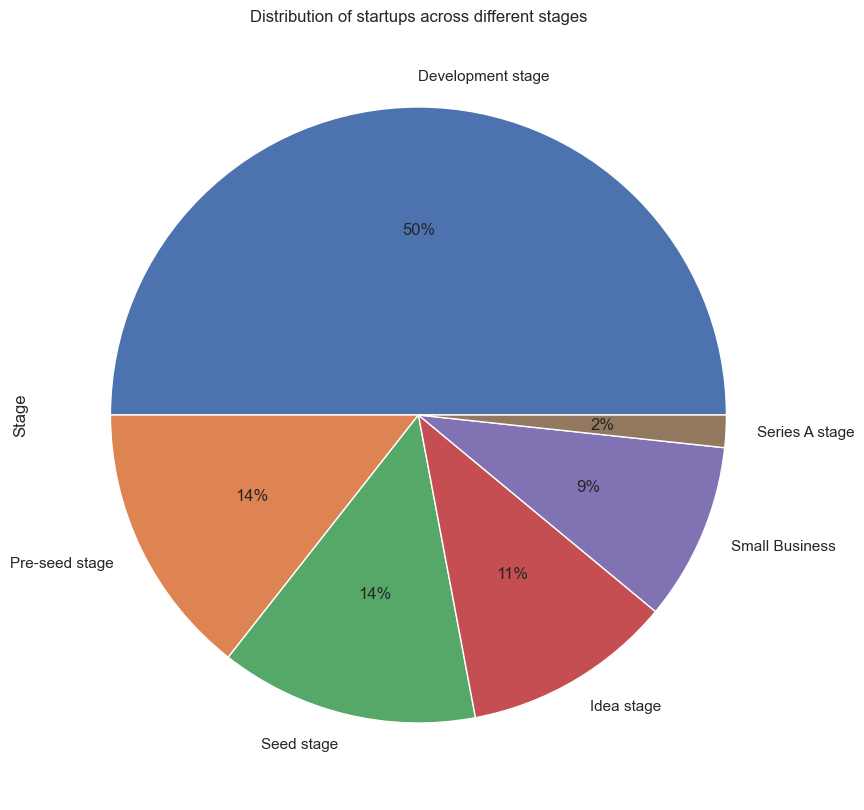

In [5]:
#What is the distribution of startups across different stages?
#Showing the distribution of startups across different stages as pie chart.
sns.set(rc={'figure.figsize': (10,10)})

df_startup["Stage"].value_counts().plot(kind="pie", autopct = "%1.f%%")
plt.title("Distribution of startups across different stages")
plt.show()

### This means half of the stage in startups is development stage

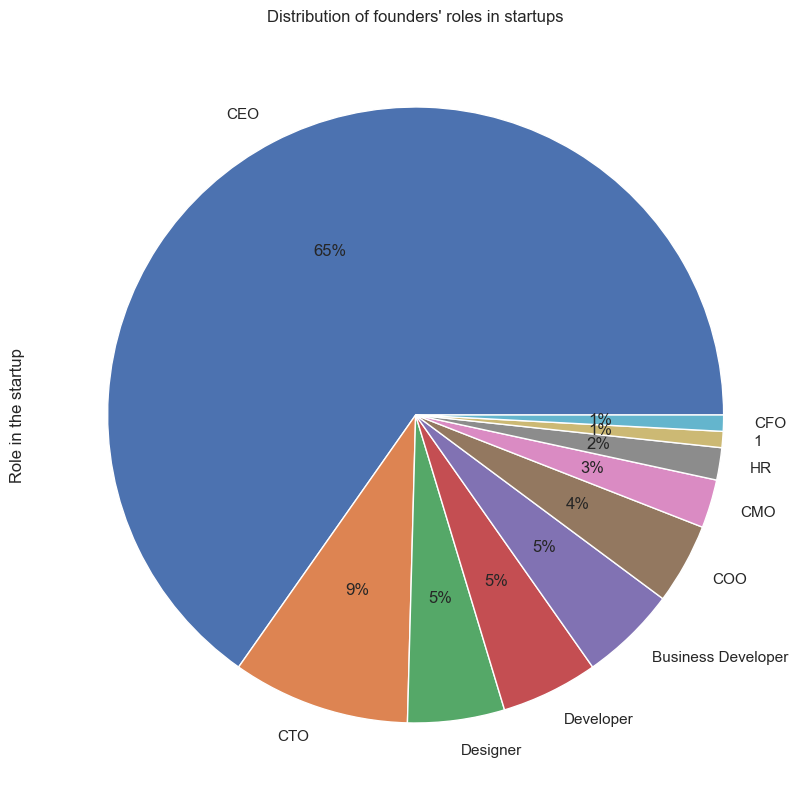

In [6]:
#Which roles do founders commonly hold in startups?
#Showing the distribution of founders' roles in startups as pie chart.
sns.set(rc={'figure.figsize': (10,10)})

df_startup["Role in the startup"].value_counts().plot(kind="pie", autopct = "%1.f%%")
plt.title("Distribution of founders' roles in startups")
plt.show()

### This pie chart shows that founders generally hold the CEO role in the startups in this dataset.

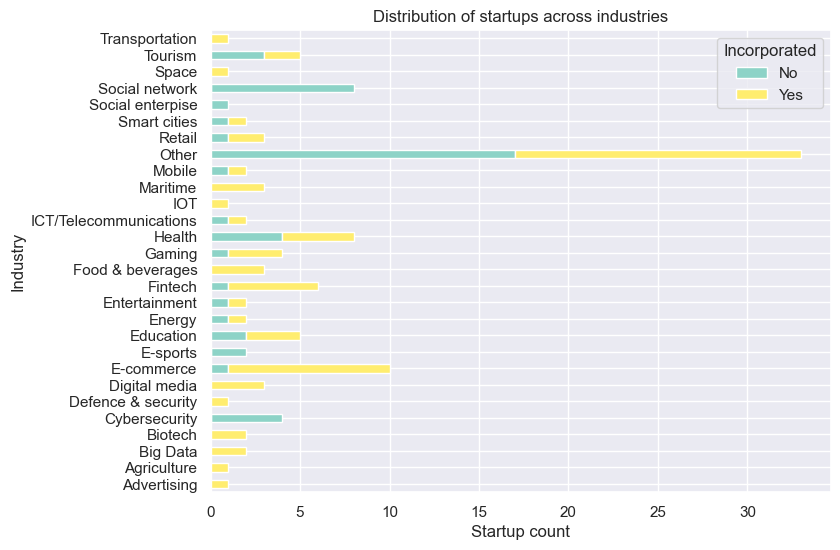

In [7]:
#Which industries have the highest number of startups?

#Showing the distribution of startups across industries.

industry_counts = df_startup.groupby(['Industry', 'Incorporated']).size().unstack()

sns.set(rc={'figure.figsize':(8,6)})
industry_counts.plot(kind='barh',  colormap="Set3", stacked=True)
plt.xlabel("Startup count")
plt.title("Distribution of startups across industries")
plt.show()

### As we can see, the industry called "Other" has the most number of startups. After that we can see the "E-commerce" industry as the second industry that has most number of startups.

# Visualization of Ages of Founders

Average age of male founders: 34.25
Average age of female founders: 36.96666666666667


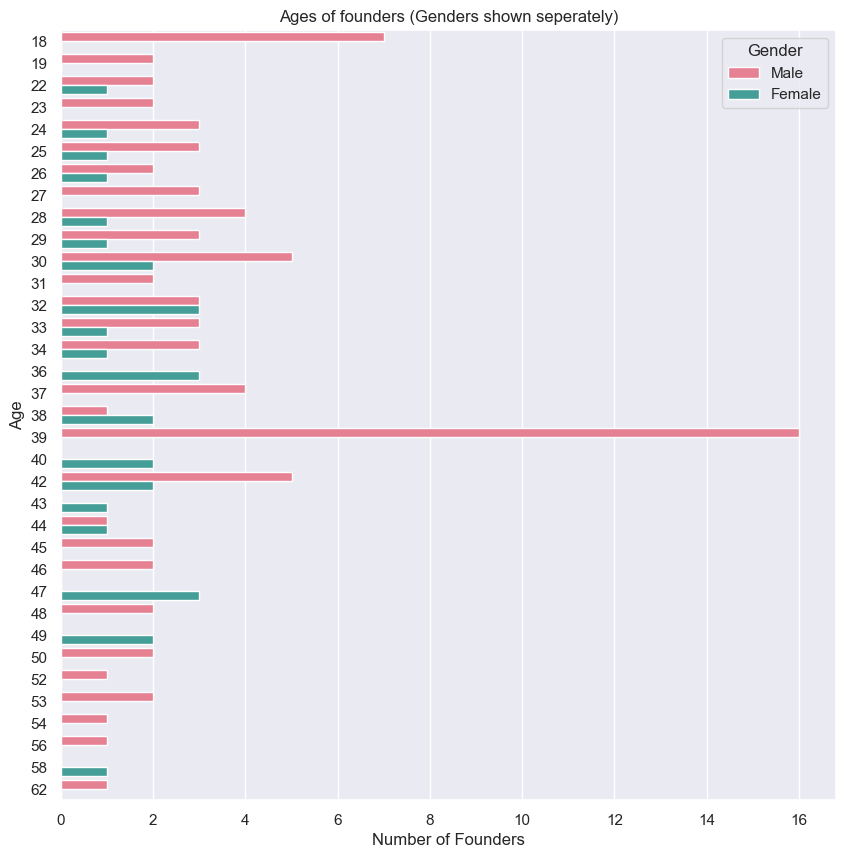

In [8]:
#Visualization of ages of founders. (Genders shown seperately)

#Defining average age calculator function
def calculate_average_age(founder_ages):
    total_ages = sum(founder_ages)
    average_age = total_ages / len(founder_ages)
    return average_age

#Converting floats to integers
df_startup['Age'] = df_startup['Age'].astype(int)

male_ages = df_startup[(df_startup['Gender'] == "Male")]["Age"].tolist()
female_ages = df_startup[(df_startup['Gender'] == "Female")]["Age"].tolist()

male_average_age = calculate_average_age(male_ages)
female_average_age = calculate_average_age(female_ages)

print("Average age of male founders:", male_average_age)
print("Average age of female founders:", female_average_age)


sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(data=df_startup,y="Age",hue="Gender",palette="husl")
plt.xlabel("Number of Founders")
plt.title("Ages of founders (Genders shown seperately)")
plt.show()

### As we can see the most number of founders (16 people) are in their 39th age and they are all male. It is pretty interesting.

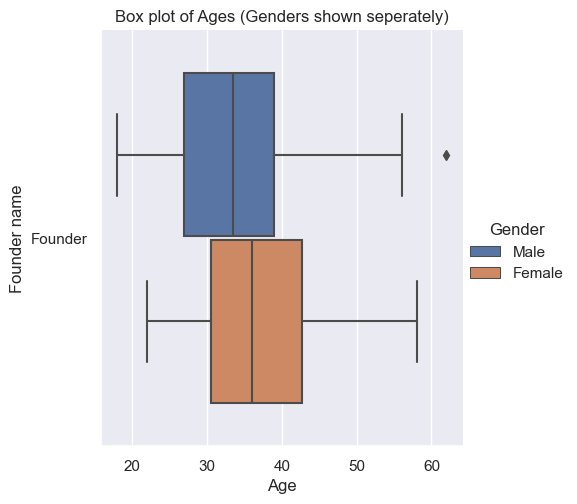

In [9]:
#Visualization of ages of founders. (Genders shown seperately)
sns.catplot(data=df_startup, x="Age", y="Founder name", hue="Gender", kind="box")
plt.title("Box plot of Ages (Genders shown seperately)")
plt.show()

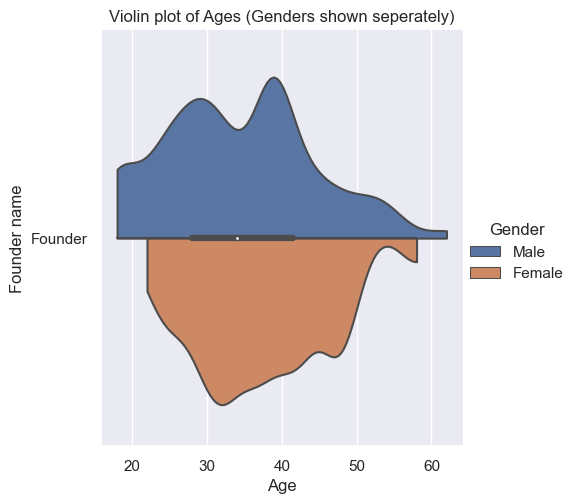

In [10]:
#Visualization of ages of founders. (Genders shown seperately)
#Violin plot
df = df_startup.astype({"Age": float})
sns.catplot(
    data=df, x="Age", y="Founder name", hue="Gender",
    kind="violin", bw=.25, cut=0, split=True,
)
plt.title("Violin plot of Ages (Genders shown seperately)")
plt.show()

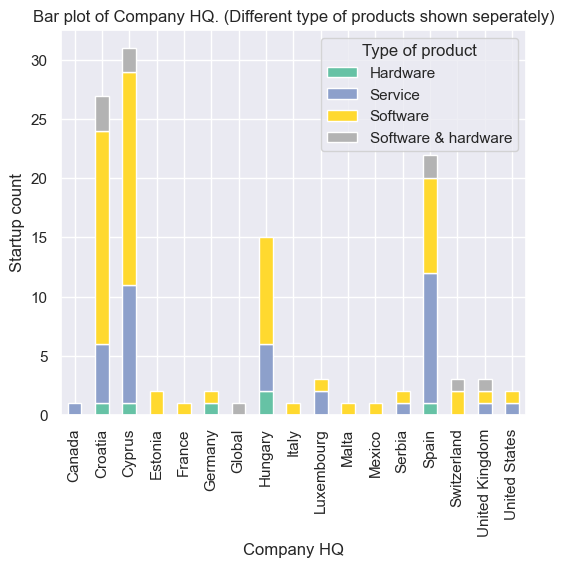

In [11]:
#Visualization of Company HQ. (Different type of products shown seperately)
sns.set(rc={'figure.figsize':(6,5)})

#sns.countplot(data=df_startup,y="Company HQ",hue="Type of product")
company_hq = df_startup.groupby(['Company HQ', 'Type of product']).size().unstack()

# Plot the stacked bar chart
company_hq.plot(kind='bar', stacked=True, colormap='Set2')
plt.ylabel("Startup count")
plt.title("Bar plot of Company HQ. (Different type of products shown seperately)")
plt.show()

### As we can see the most number of startups' headquarters are located in Cyprus. But Spain has more headquarters in the service type.

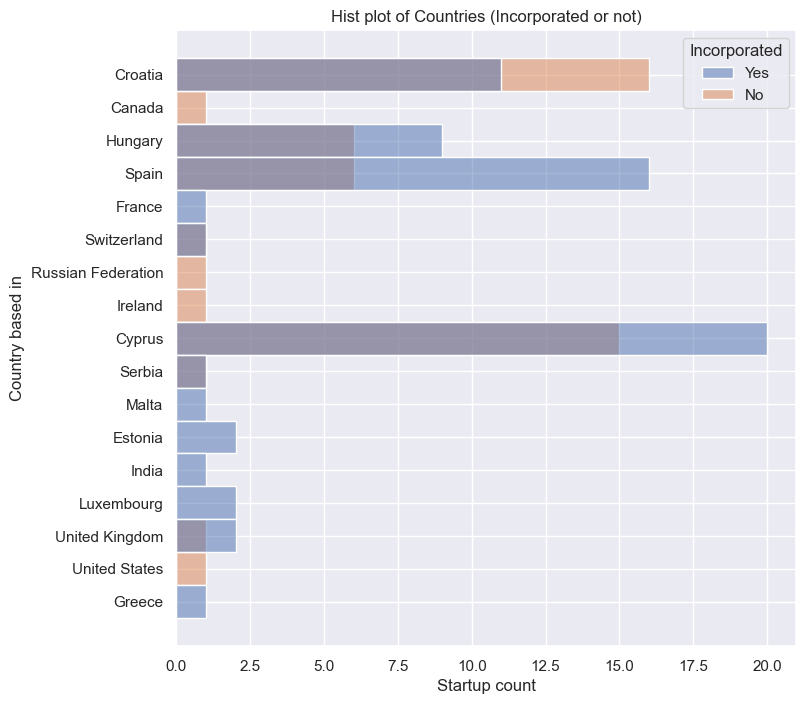

In [12]:
#Which countries are most represented in the "Country based in" feature? (Show incorporated value too)

sns.set(rc={'figure.figsize':(8,8)})
sns.histplot(data=df_startup,y="Country based in",hue="Incorporated")
plt.title("Hist plot of Countries (Incorporated or not)")
plt.xlabel("Startup count")
plt.show()

### In general, we can see that incorporated startups are greater than not-incorporated startups in count in these countries.
### Same as the company hq feature, Cyprus has the most number of startups in the "Country based in" feature as well.

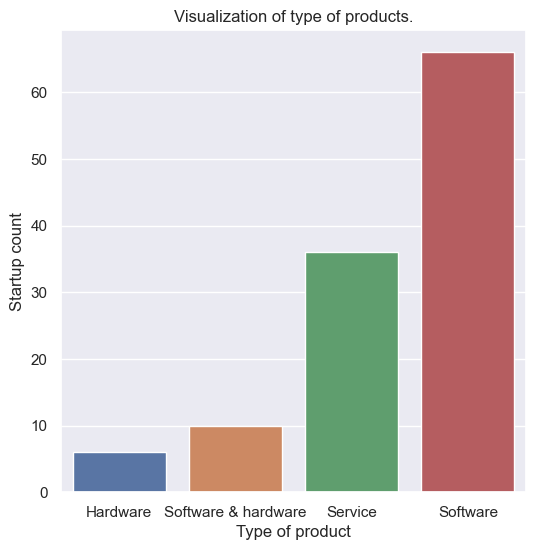

In [13]:
#What are the most common types of products offered by startups?
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(data=df_startup,x="Type of product")
plt.ylabel("Startup count")
plt.title("Visualization of type of products.")
plt.show()

### In the "type of product" feature, software has the crown by far. And the hardware has the least number of startup count.

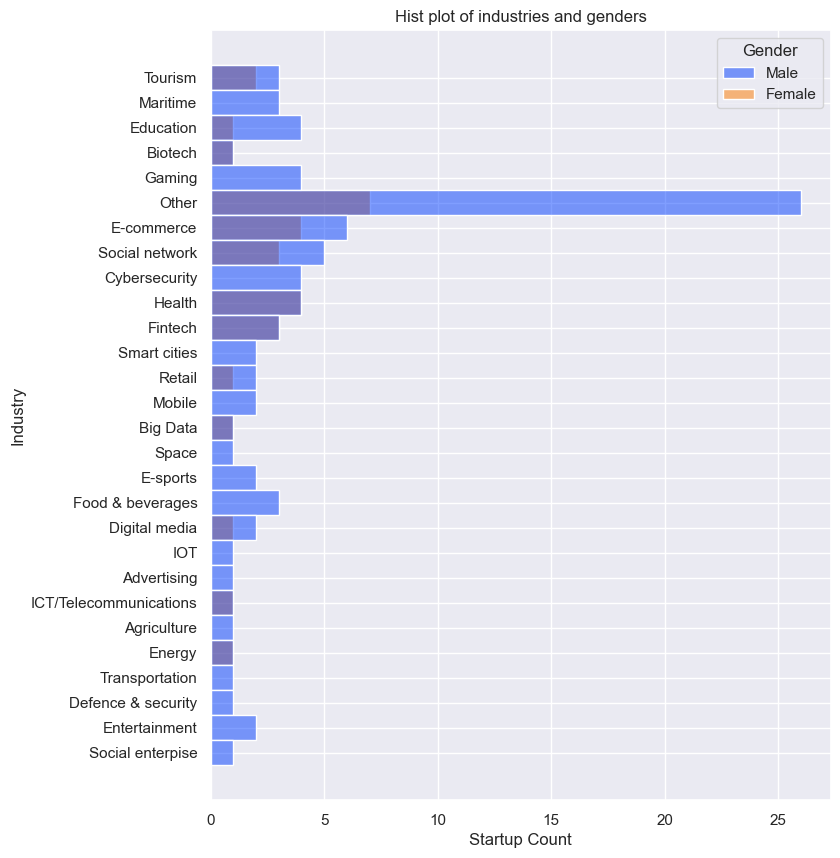

In [14]:
#Are there any industries that are more dominated by startups led by a particular gender?
sns.set(rc={'figure.figsize':(8,10)})
sns.histplot(data=df_startup,y="Industry",hue="Gender", palette="bright")
plt. xlabel("Startup Count")
plt.title("Hist plot of industries and genders")
plt.show()

### Most industries are led by males but we can also see Biotech, Health, Fintech, Big Data, ICT/Telecommunications and Energy industries and they have the same number of startup founders in each gender.

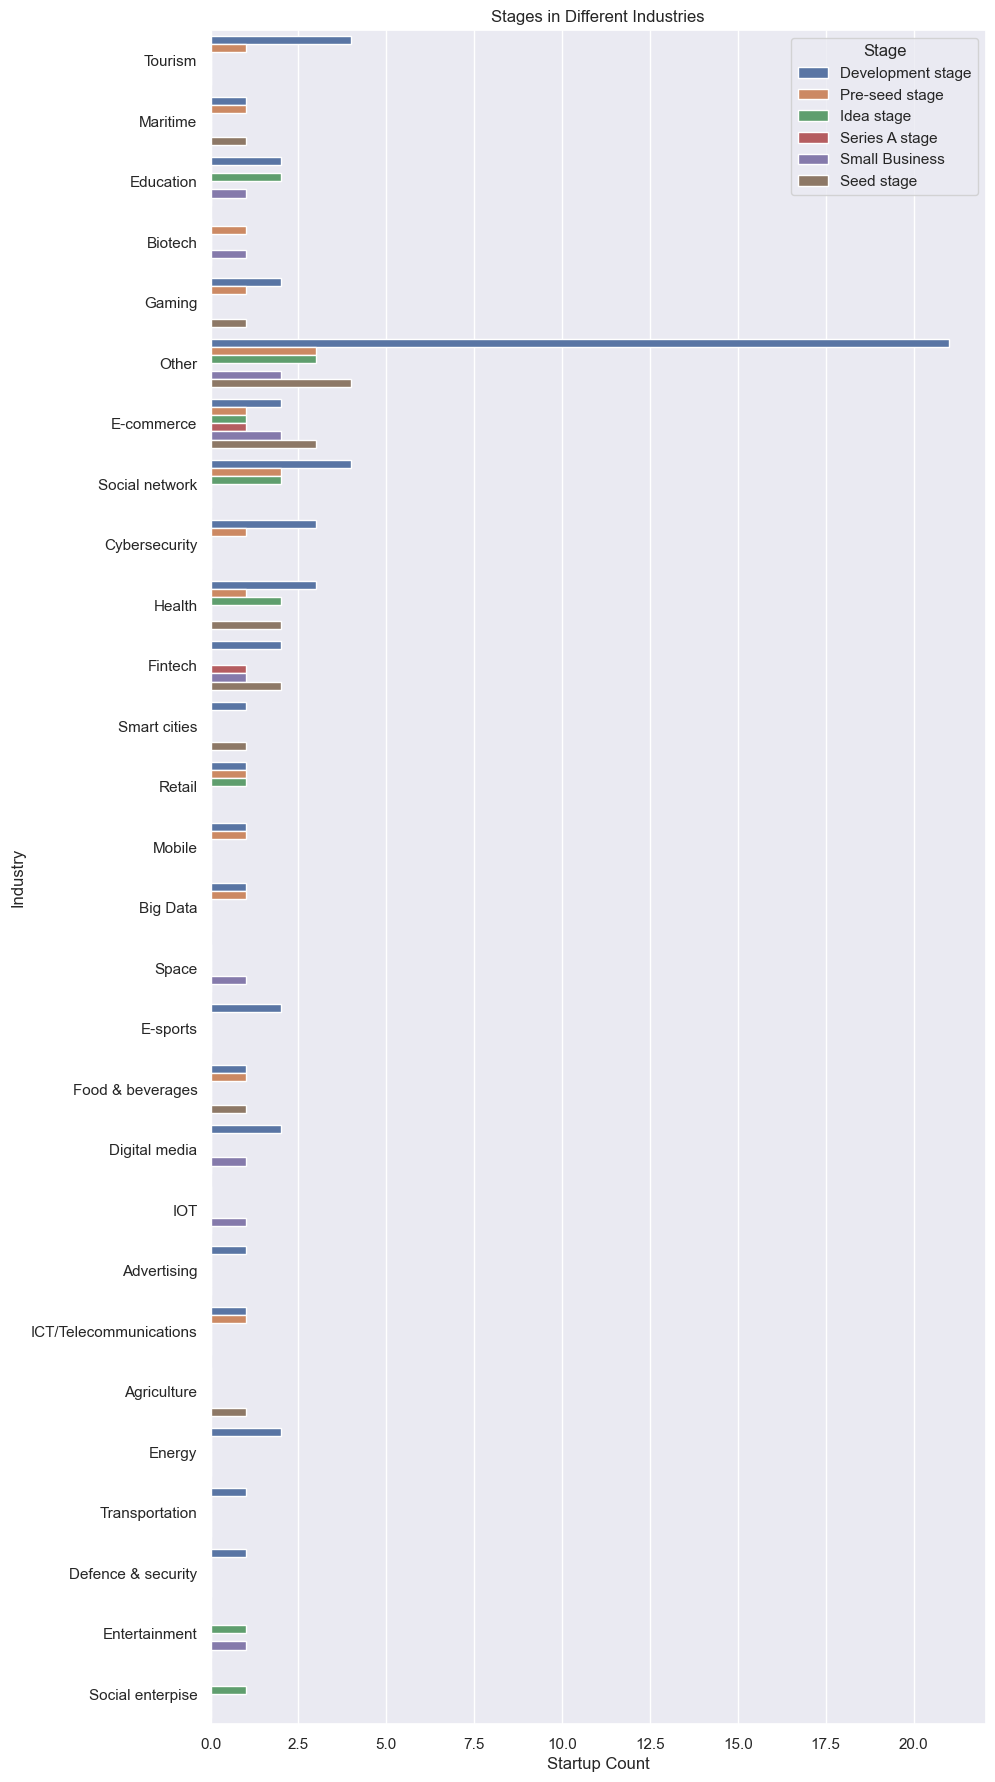

In [15]:
#What are the most common stages in different industries?
sns.set(rc={'figure.figsize': (10, 22)})
sns.countplot(data=df_startup, y="Industry", hue="Stage")
plt.xlabel('Startup Count')
plt.ylabel('Industry')
plt.title('Stages in Different Industries')
plt.show()

### The industry called "Other", has the most number of startups which work on development stage, pre-seed stage, seed stage and idea stage. It also shares the first place with E-commerce about the small business stage. But "Other" industry has no startups which work on Series A stage.

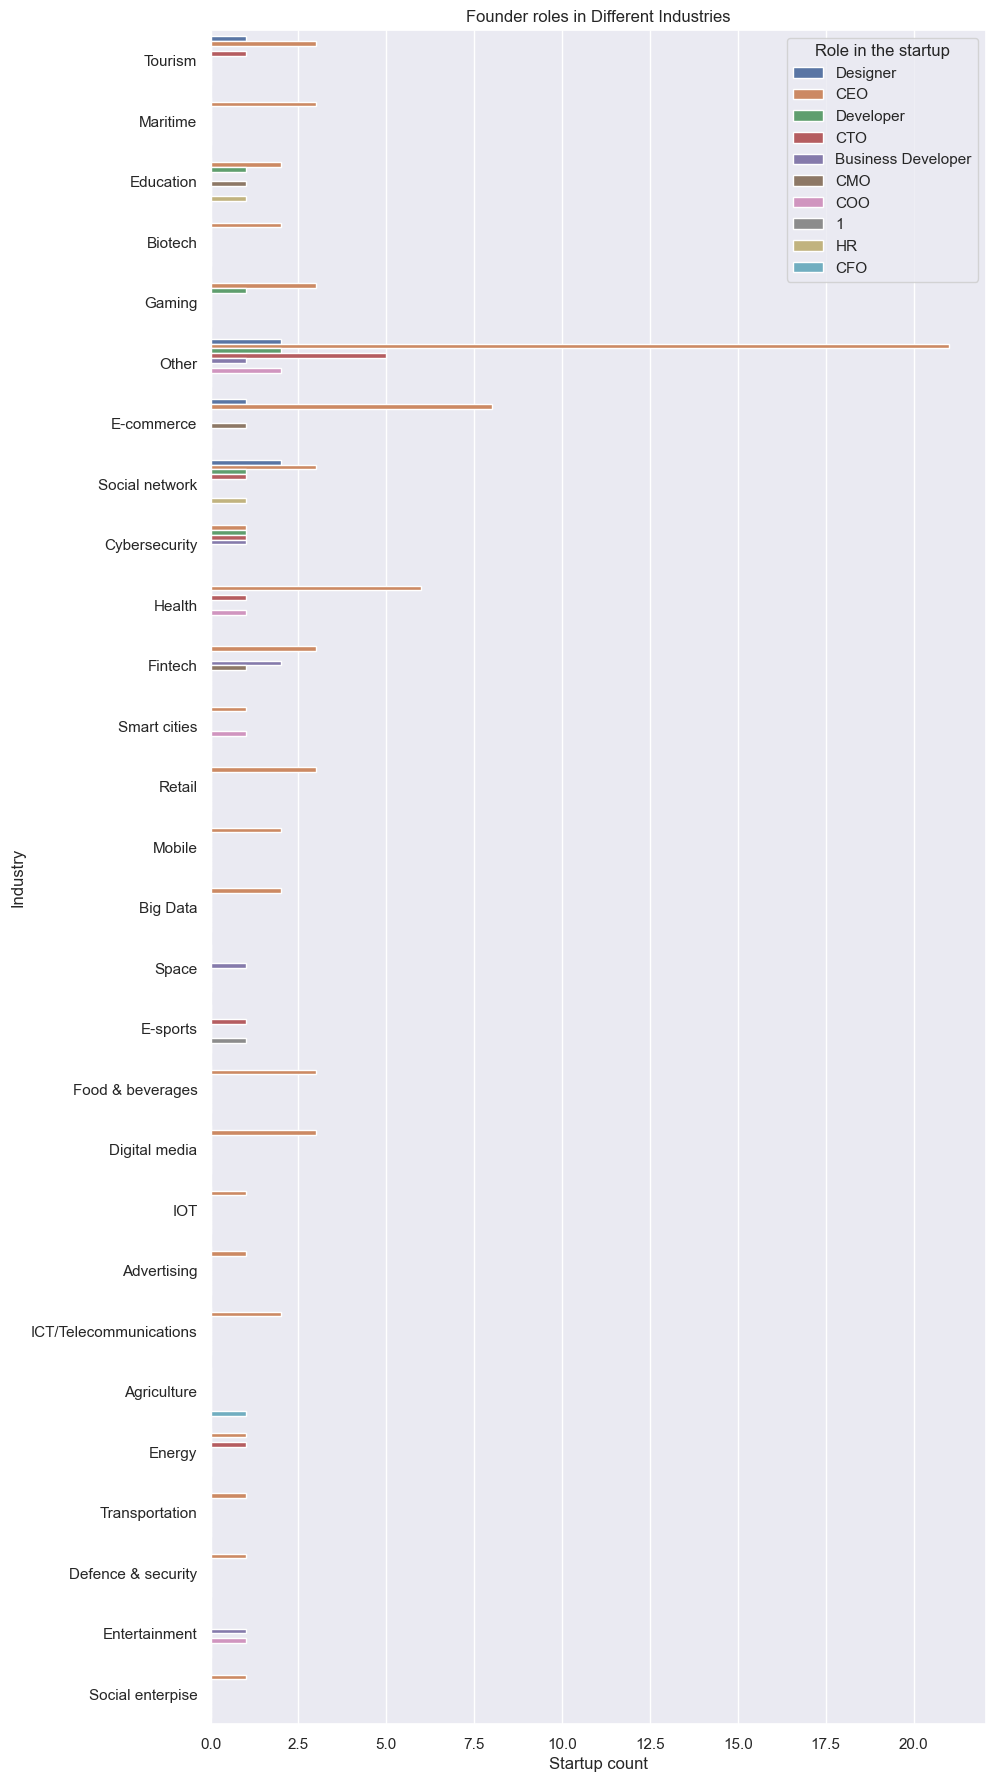

In [16]:
#Visualization of founder roles in different industries.
sns.set(rc={'figure.figsize': (10, 22)})
sns.countplot(data=df_startup, y="Industry", hue="Role in the startup")
plt.xlabel('Startup count')
plt.ylabel('Industry')
plt.title('Founder roles in Different Industries')
plt.show()

### This is the visualization of founder roles in different industries. The "Other" industry is holding the lead in almost every role.

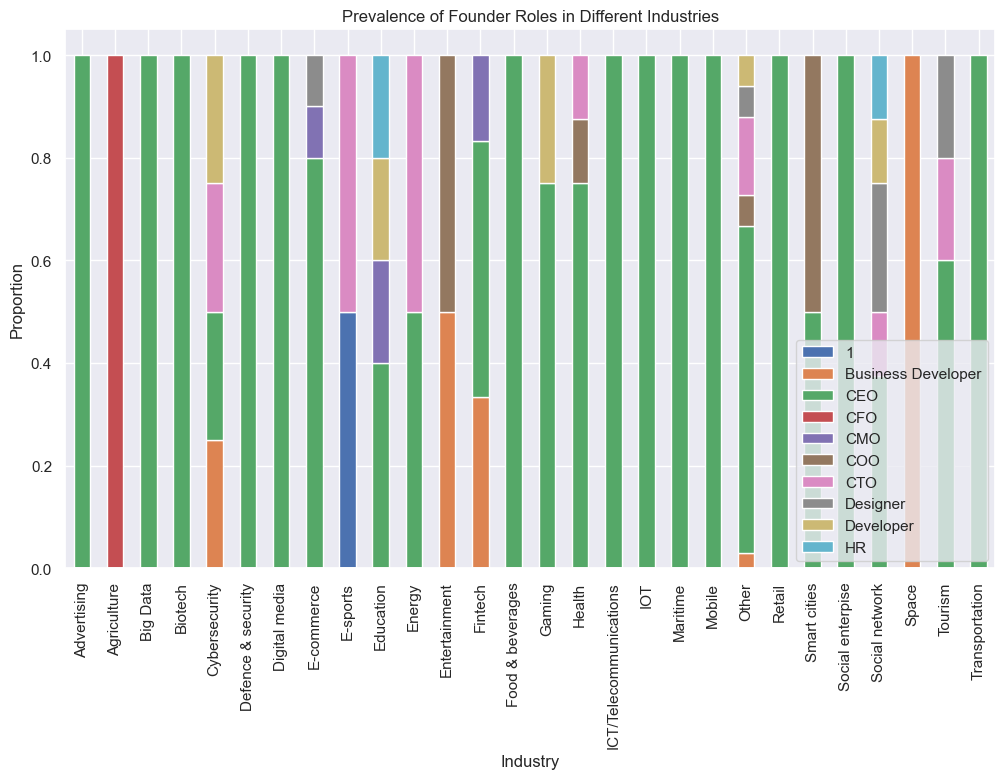

In [17]:
# Visualizing the prevalance of founder roles in different industries.

role_counts = df_startup.groupby(['Industry', 'Role in the startup']).size().unstack()
role_proportions = role_counts.div(role_counts.sum(axis=1), axis=0)

sns.set(rc={'figure.figsize': (12, 7)})
role_proportions.plot(kind='bar', stacked=True)
plt.xlabel('Industry')
plt.ylabel('Proportion')
plt.title('Prevalence of Founder Roles in Different Industries')
plt.legend(loc='lower right')
plt.show()





### In the shown plot, we mostly see green and this means the founders hold CEO role in the startups generally.

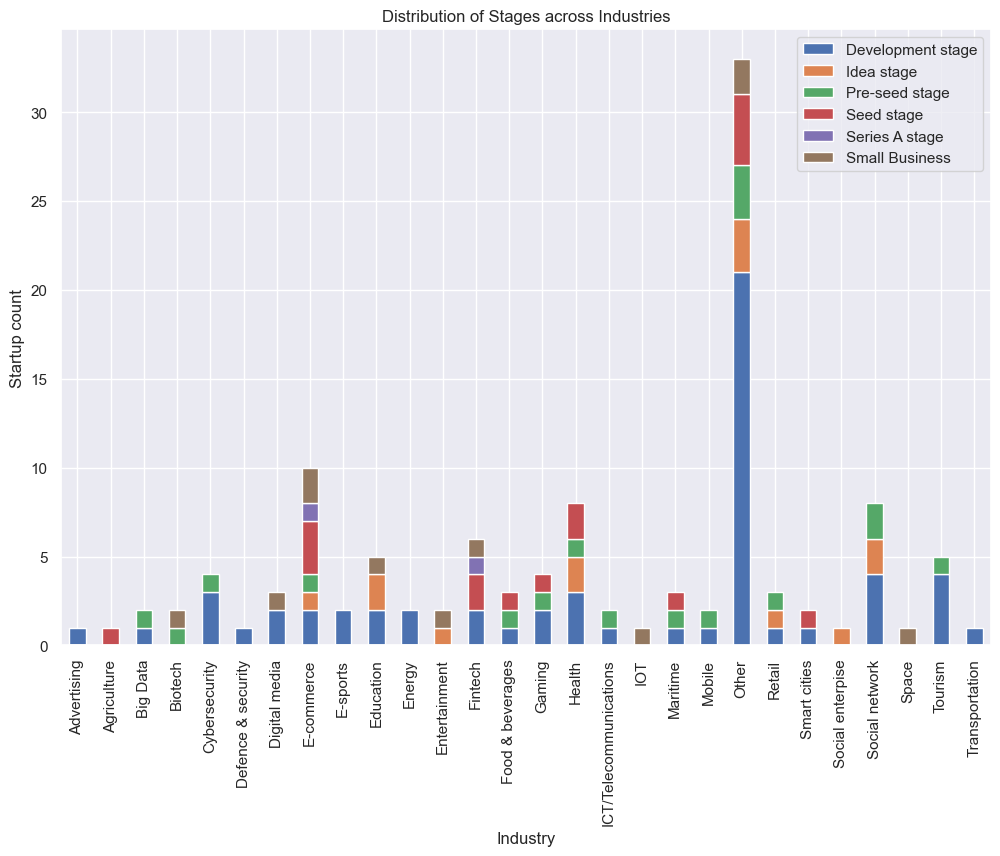

In [18]:
#Visualization of stages in different industries.

stage_industry = df_startup.groupby(['Industry', 'Stage']).size().unstack()

sns.set(rc={'figure.figsize': (12, 8)})
stage_industry.plot(kind='bar', stacked=True)
plt.xlabel('Industry')
plt.ylabel('Startup count')
plt.title('Distribution of Stages across Industries')
plt.legend(loc='upper right')
plt.show()


# Checking the Correlations

## Since there are not enough numerical features, I can't plot heatmaps. Instead I can analyze correlation by using p value and chi square test.

In [19]:
#Defining the is_correlated function

def is_correlated(a,b):
    ct=pd.crosstab(index=df_startup[a], columns=df_startup[b])
    chi_sq_result = chi2_contingency(ct,)
    p, c = chi_sq_result[1], "a significant correlation" if chi_sq_result[1] < 0.05 else "no significant correlation"
    print(f"p value is {p} .It means there is {c} between {a} and {b} features.")


In [20]:
#Checking the correlation between "Role in the startup" and "Stage" features.
is_correlated("Role in the startup","Stage")

p value is 0.1349016246648361 .It means there is no significant correlation between Role in the startup and Stage features.


In [21]:
#Checking the correlation between "Company HQ" and "Type of product" features.
is_correlated("Company HQ","Type of product")

p value is 0.566136387770784 .It means there is no significant correlation between Company HQ and Type of product features.


In [22]:
#Checking the correlation between "Age" and "Role in the startup" features.
is_correlated("Age","Role in the startup")

p value is 0.0012981952837880088 .It means there is a significant correlation between Age and Role in the startup features.


### Finally, we have catched a correlation! Now we can see clearly by visualizing this.

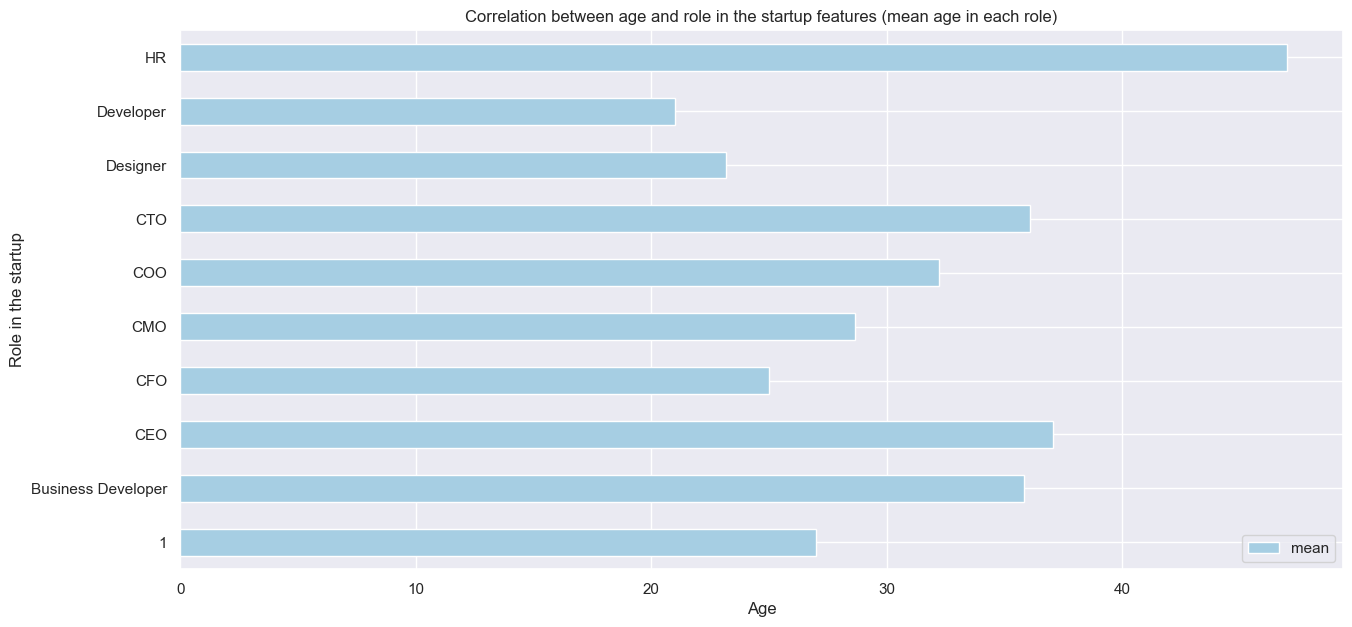

In [23]:
#Visualizing the correlation between Age and Role in the startup features

#Distribution of Ages across roles
age_role = df_startup.groupby(['Role in the startup'])['Age'].agg(['mean'])
sns.set(rc={'figure.figsize': (15,7)})


age_role.plot(kind='barh', stacked=False, colormap="Paired")
plt.ylabel('Role in the startup')
plt.xlabel('Age')
plt.title('Correlation between age and role in the startup features (mean age in each role)')
plt.show()


### According to this results, we can say that the younger founders are holding the developer and designer roles generally but the older founders are holding HR role in startups generally.

In [24]:
#Checking the correlation between "Country based in" and "Role in the startup" features.
is_correlated("Country based in","Role in the startup")

p value is 0.7043540310736354 .It means there is no significant correlation between Country based in and Role in the startup features.


In [25]:
#Checking the correlation between "Country based in" and "Stage" features.
is_correlated("Country based in","Stage")

p value is 0.45326176196881834 .It means there is no significant correlation between Country based in and Stage features.


In [26]:
#Checking the correlation between "Country based in" and "Role in the startup" features.
is_correlated("Country based in","Company HQ")

p value is 3.1631678119609444e-163 .It means there is a significant correlation between Country based in and Company HQ features.


### Obviously there is a significant correlation between "Country based in" and "Company HQ" features. It is not hard to guess that generally headquarters will be located in the country startup based in.

In [27]:
#The rows which has the same country in the "Company HQ" and "Country based in" features.
matching_countries = df_startup.loc[(df_startup["Country based in"]==df_startup["Company HQ"])]
matching_countries

,#,Startup,Stage,Industry,Company HQ,Incorporated,Type of product,Founder name,Gender,Country based in,Age,Role in the startup
0,1,Startup 1,Development stage,Tourism,Croatia,Yes,Hardware,Founder,Male,Croatia,28,Designer
1,2,Startup 2,Pre-seed stage,Maritime,Croatia,Yes,Software & hardware,Founder,Male,Croatia,53,CEO
2,3,Startup 3,Idea stage,Education,Canada,No,Service,Founder,Male,Canada,37,CEO
3,4,Startup 4,Pre-seed stage,Biotech,Croatia,Yes,Service,Founder,Female,Croatia,43,CEO
4,5,Startup 5,Development stage,Gaming,Croatia,No,Service,Founder,Male,Croatia,23,Developer
...,...,...,...,...,...,...,...,...,...,...,...,...
111,112,Startup 95,Seed stage,Gaming,Cyprus,Yes,Software,Founder,Male,Cyprus,39,CEO
112,113,Startup 96,Idea stage,Social enterpise,Cyprus,No,Software,Founder,Male,Cyprus,39,CEO
113,114,Startup 97,Development stage,Energy,Cyprus,No,Software & hardware,Founder,Female,Cyprus,34,CTO
115,116,Startup 99,Idea stage,Other,Cyprus,No,Service,Founder,Male,Cyprus,39,CEO


In [28]:
#The value counts
matching_countries["Company HQ"].value_counts()


Cyprus            30
Croatia           27
Spain             21
Hungary           15
Switzerland        2
Serbia             2
Estonia            2
Luxembourg         2
United Kingdom     2
Canada             1
France             1
Malta              1
United States      1
Name: Company HQ, dtype: int64

In [29]:
#The total number of this rows which has matching features
total = matching_countries["Company HQ"].value_counts().sum()
print(f"Total number of rows which has matching features is {total}")

Total number of rows which has matching features is 107


### We have exactly 118 rows in the whole dataset and 107 rows in this dataset has the same country in the "Company HQ" and "Country based in" features. This is a huge correlation.

In [30]:
#Checking the correlation between "Country based in" and "Age" features.
is_correlated("Country based in","Age")

p value is 0.7929830799863913 .It means there is no significant correlation between Country based in and Age features.


In [31]:
#Checking the correlation between "Country based in" and "Type of product" features.
is_correlated("Country based in","Type of product")

p value is 0.9811188178339783 .It means there is no significant correlation between Country based in and Type of product features.


In [32]:
#Checking the correlation between "Type of product" and "Age" features.
is_correlated("Type of product","Age")

p value is 0.12366203521154787 .It means there is no significant correlation between Type of product and Age features.


In [33]:
#Checking the correlation between "Type of product" and "Stage" features.
is_correlated("Type of product","Stage")

p value is 0.24019613577472546 .It means there is no significant correlation between Type of product and Stage features.


In [34]:
#Checking the correlation between "Industry" and "Age" features.
is_correlated("Stage","Age")

p value is 0.30899085210377053 .It means there is no significant correlation between Stage and Age features.


In [35]:
#Checking the correlation between "Industry" and "Age" features.
is_correlated("Industry","Age")

p value is 0.0316844279697686 .It means there is a significant correlation between Industry and Age features.


### We have catched another correlation.

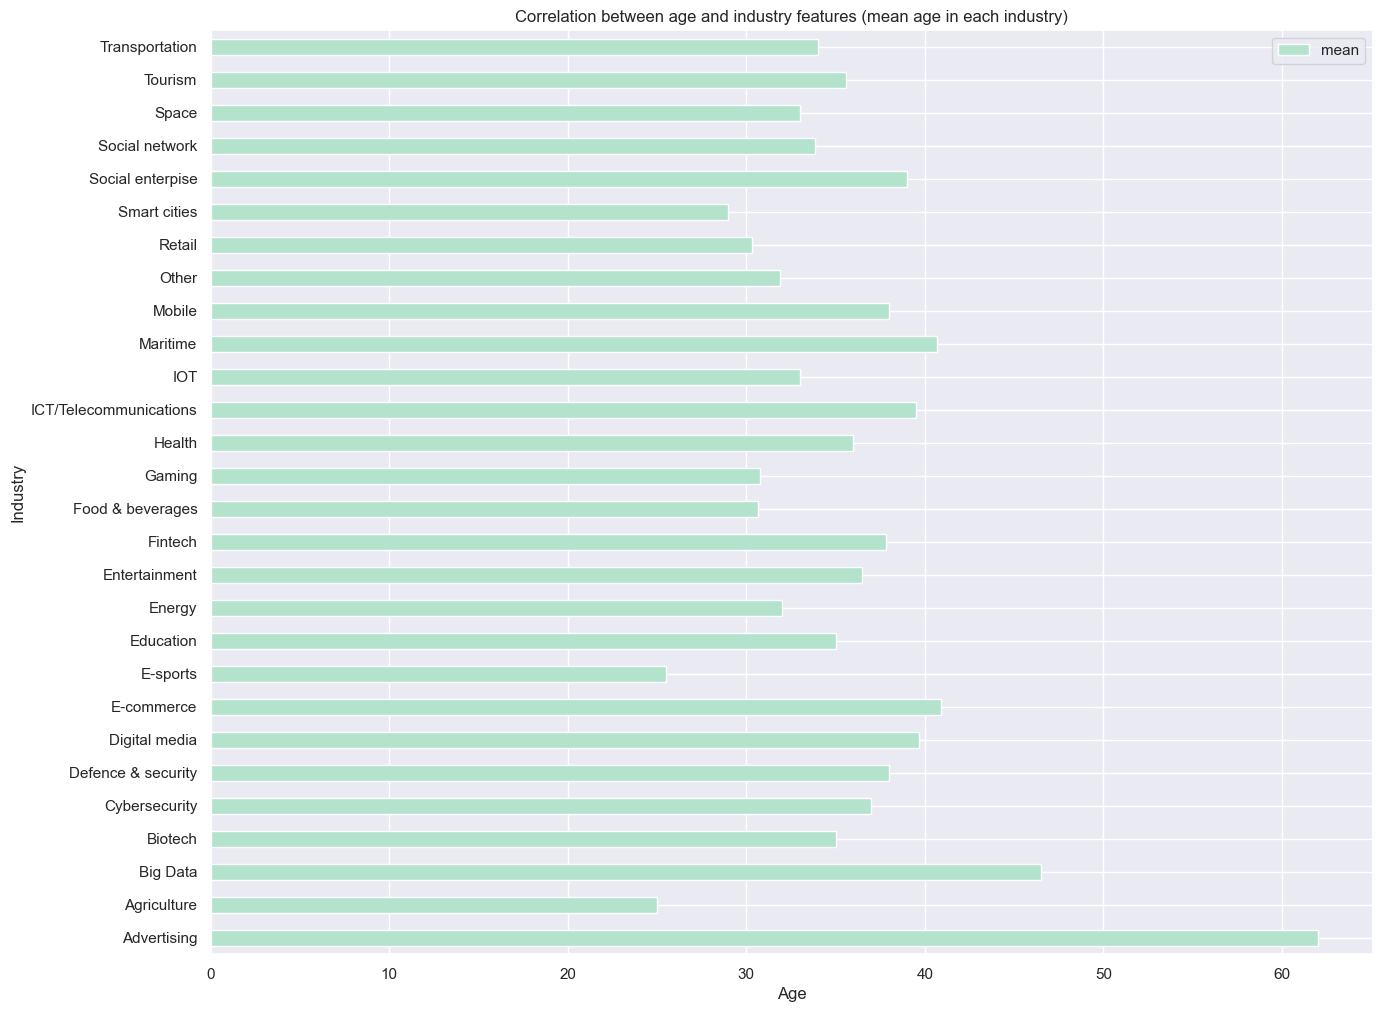

In [36]:
#Visualizing the correlation between Age and Industry features

#Distribution of Ages across Industries.
age_industry = df_startup.groupby(['Industry'])['Age'].agg(['mean'])
sns.set(rc={'figure.figsize': (15,12)})


age_industry.plot(kind='barh', stacked=False, colormap="Pastel2")
plt.ylabel('Industry')
plt.xlabel('Age')
plt.title('Correlation between age and industry features (mean age in each industry)')
plt.show()


### We can see that the startups which's founders are older are working on advertising industry generally. And the startups which's founders are younger are working on agriculture industry in general.

In [37]:
#Checking the correlation between "Stage" and "Age" features.
is_correlated("Stage","Age")

p value is 0.30899085210377053 .It means there is no significant correlation between Stage and Age features.


In [38]:
#Checking the correlation between "Industry" and "Stage" features.
is_correlated("Industry","Stage")

p value is 0.8019917028565346 .It means there is no significant correlation between Industry and Stage features.


In [39]:
#Checking the correlation between "Industry" and "Country based in" features.
is_correlated("Industry","Country based in")

p value is 0.5171334396761543 .It means there is no significant correlation between Industry and Country based in features.


In [40]:
#Checking the correlation between "Industry" and "Type of product" features.
is_correlated("Industry","Type of product")

p value is 0.0031533117007661758 .It means there is a significant correlation between Industry and Type of product features.


# We've catched another correlation.

In [41]:
#Seperating the types.

service = df_startup[df_startup["Type of product"]=="Service"]
software = df_startup[df_startup["Type of product"]=="Software"]
software_and_hardware = df_startup[df_startup["Type of product"]=="Software & hardware"]
hardware = df_startup[df_startup["Type of product"]=="Hardware"]

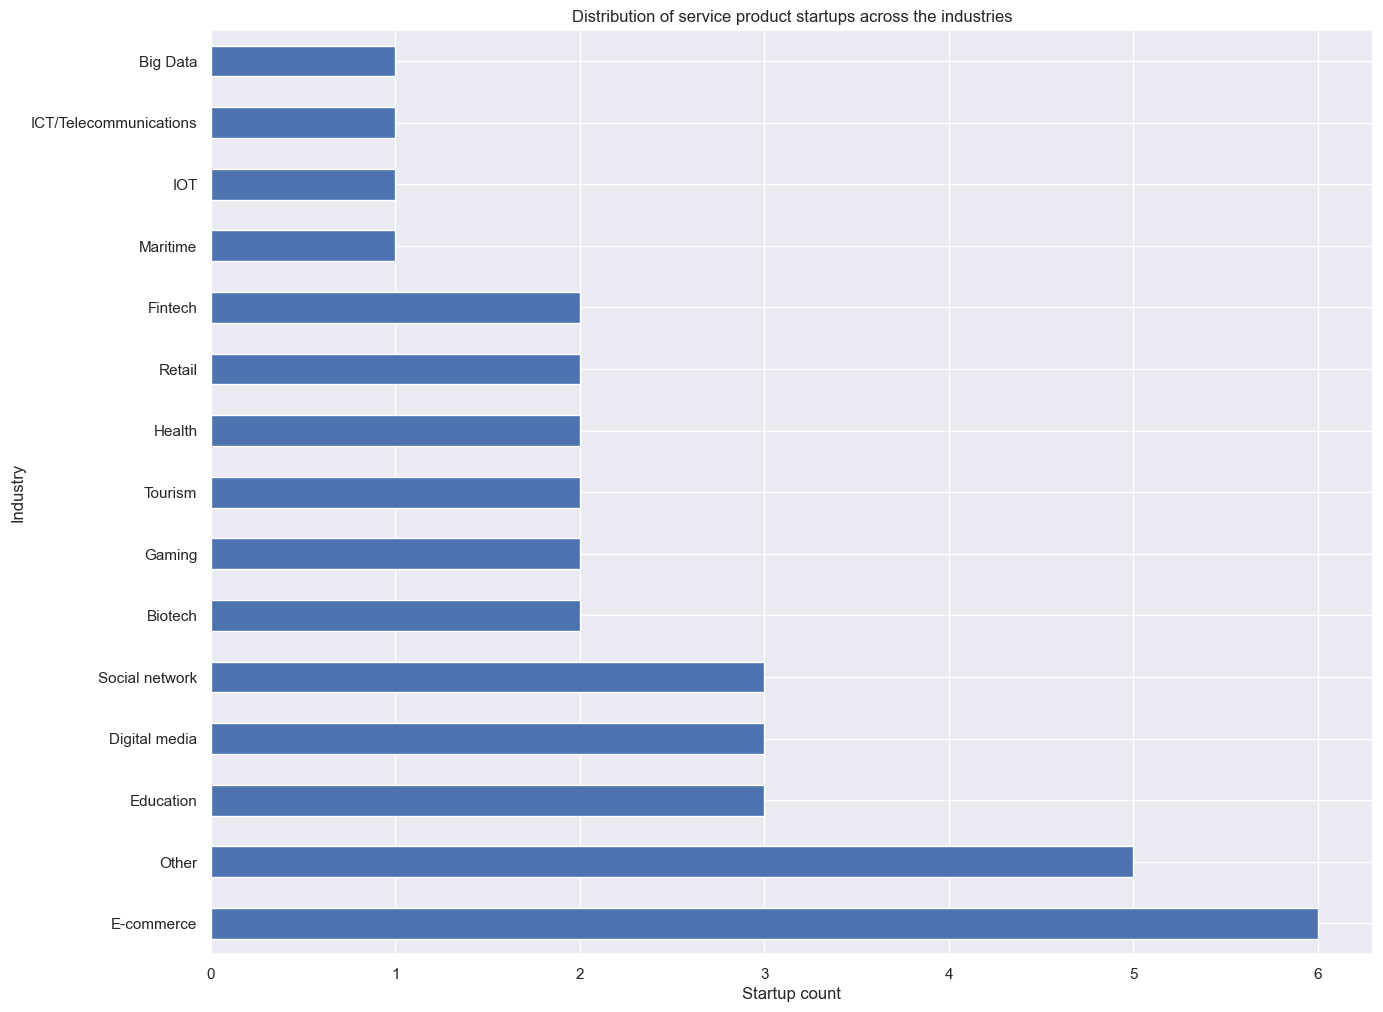

In [42]:
service["Industry"].value_counts().plot(kind="barh")
sns.set(rc={'figure.figsize': (5,5)})
plt.xlabel("Startup count")
plt.ylabel("Industry")
plt.title("Distribution of service product startups across the industries")
plt.show()

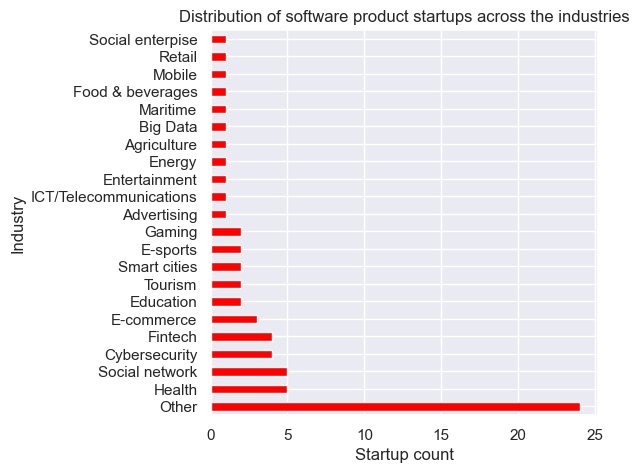

In [43]:
software["Industry"].value_counts().plot(kind="barh", color="red")
plt.xlabel("Startup count")
plt.ylabel("Industry")
plt.title("Distribution of software product startups across the industries")
plt.show()

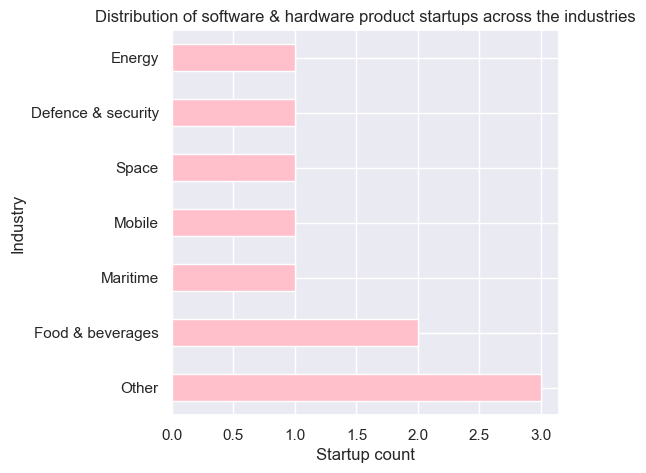

In [44]:
sns.set(rc={'figure.figsize': (5,5)})
software_and_hardware["Industry"].value_counts().plot(kind="barh", color="pink")
plt.xlabel("Startup count")
plt.ylabel("Industry")
plt.title("Distribution of software & hardware product startups across the industries")
plt.show()

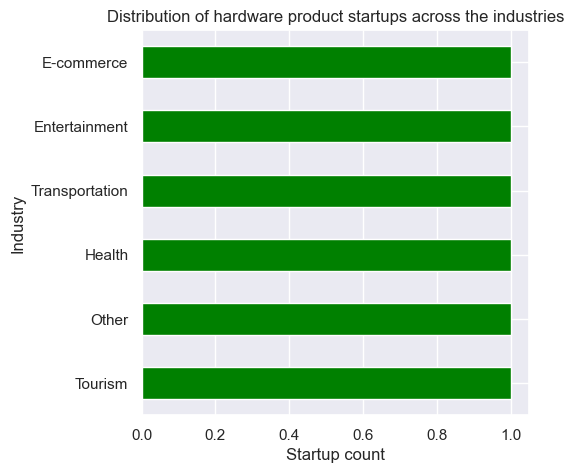

In [45]:
sns.set(rc={'figure.figsize': (5,5)})
hardware["Industry"].value_counts().plot(kind="barh", color="green")
plt.xlabel("Startup count")
plt.ylabel("Industry")
plt.title("Distribution of hardware product startups across the industries")
plt.show()

### We can see the "Other" industry is common in software product startups. And "E-commerce" industry is common in service product startups.

In [46]:
#Checking the correlation between "Role in the startup" and "Industry" features.
is_correlated("Role in the startup","Industry")

p value is 0.00029544038163352443 .It means there is a significant correlation between Role in the startup and Industry features.


### I've shown this correlation (see the line 16, Founder roles in Different Industries). According to that plot, we an say that the role CEO has the crown in almost every industry.

In [47]:
#Checking the correlation between "Role in the startup" and "Type of product" features.
is_correlated("Role in the startup","Type of product")

p value is 0.2121527917147294 .It means there is no significant correlation between Role in the startup and Type of product features.


In [48]:
#Checking the correlation between "Role in the startup" and "Incorporated" features.
is_correlated("Role in the startup","Incorporated")

p value is 0.056657137364902396 .It means there is no significant correlation between Role in the startup and Incorporated features.


In [49]:
#Checking the correlation between "Incorporated" and "Type of product" features.
is_correlated("Incorporated","Type of product")

p value is 0.18866615435439044 .It means there is no significant correlation between Incorporated and Type of product features.


In [50]:
#Checking the correlation between "Incorporated" and "Age" features.
is_correlated("Incorporated","Age")

p value is 0.016581429185002602 .It means there is a significant correlation between Incorporated and Age features.


### There is a correlation!

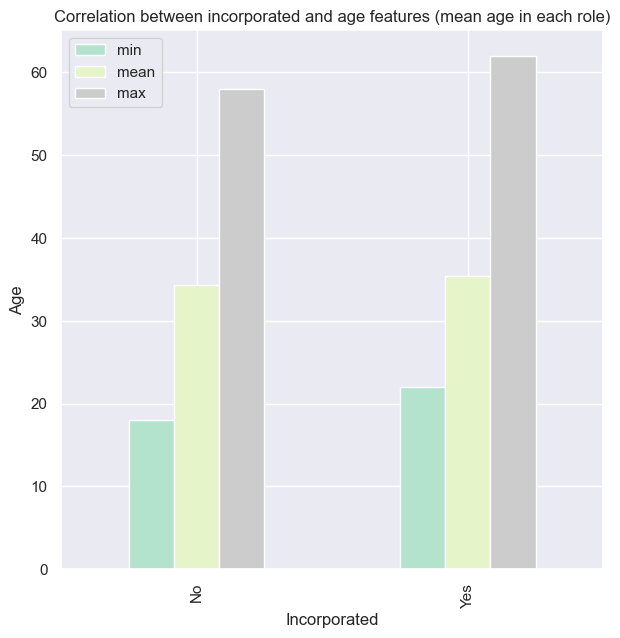

In [51]:
#Visualizing the correlation between Age and Incorporated features

#Distribution of Ages across Incorporated feature
age_stage = df_startup.groupby(['Incorporated'])['Age'].agg(['min','mean','max'])
sns.set(rc={'figure.figsize': (7,7)})
age_stage.plot(kind='bar', colormap="Pastel2")
plt.xlabel('Incorporated')
plt.ylabel('Age')
plt.title('Correlation between incorporated and age features (mean age in each role)')
plt.show()

### The incorporated startups' founders are slightly older than the unincorporated startups' founders.

In [52]:
#Checking the correlation between "Incorporated" and "Stage" features.
is_correlated("Incorporated","Stage")

p value is 9.221234865344066e-05 .It means there is a significant correlation between Incorporated and Stage features.


### We've catched another correlation.

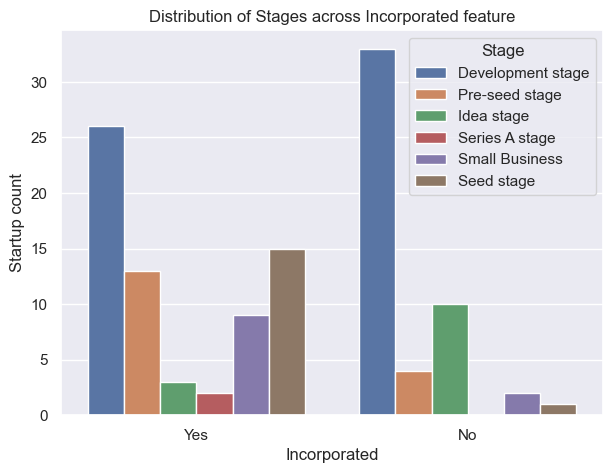

In [53]:
#Investigating the correlation between Stage and Incorporated features.
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(data=df_startup,x="Incorporated",hue="Stage")
plt.ylabel('Startup count')
plt.title('Distribution of Stages across Incorporated feature')
plt.show()


### The unincorporated startups have the majority of development stage and idea stage but have no series A stage. And the incorporated startups have the majority of pre-seed stage, small business and seed stage and have all the series A stage. 

In [54]:
#Checking the correlation between "Incorporated" and "Role in the startup" features.
is_correlated("Incorporated","Role in the startup")

p value is 0.056657137364902396 .It means there is no significant correlation between Incorporated and Role in the startup features.


In [55]:
#Checking the correlation between "Incorporated" and "Company HQ" features.
is_correlated("Incorporated","Company HQ")

p value is 0.34209702418882376 .It means there is no significant correlation between Incorporated and Company HQ features.


In [56]:
#Checking the correlation between "Incorporated" and "Stage" features.
is_correlated("Incorporated","Industry")

p value is 0.025633927723591625 .It means there is a significant correlation between Incorporated and Industry features.


### Here is another correlation!

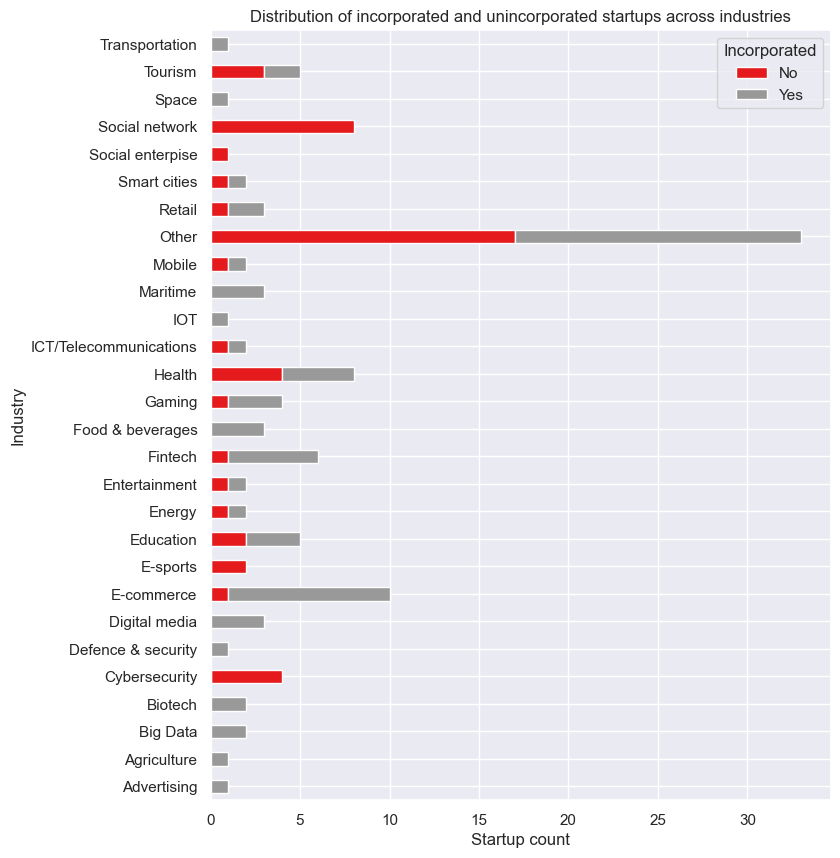

In [73]:
#Showing the distribution of incorporated and unincorporated startups across industries.
industry_counts = df_startup.groupby(['Industry', 'Incorporated']).size().unstack()
sns.set(rc={'figure.figsize':(8,10)})
industry_counts.plot(kind='barh',  colormap="Set1", stacked=True)
plt.xlabel("Startup count")
plt.title("Distribution of incorporated and unincorporated startups across industries")
plt.show()

### The unincorporated startups have the majority on cybersecurity and social network industries only.The incorporated startups have the majority of industries in general.

In [58]:
#Checking the correlation between "Gender" and "Company HQ" features.
is_correlated("Gender","Company HQ")

p value is 0.2122897727998644 .It means there is no significant correlation between Gender and Company HQ features.


In [59]:
#Checking the correlation between "Gender" and "Country based in" features.
is_correlated("Gender","Country based in")

p value is 0.05600334039453846 .It means there is no significant correlation between Gender and Country based in features.


In [60]:
#Checking the correlation between "Gender" and "Age" features.
is_correlated("Gender","Age")

p value is 0.006571971314960585 .It means there is a significant correlation between Gender and Age features.


### I've already shown three different plots about this correlation (see the lines 8, 9 and 10). According to those plots, we can say that the youngest and oldest founders in this dataset are men. And women's mean age is larger than men's mean age.

In [61]:
#Checking the correlation between "Gender" and "Stage" features.
is_correlated("Gender","Stage")

p value is 0.048041669731728805 .It means there is a significant correlation between Gender and Stage features.


### There is a correlation!

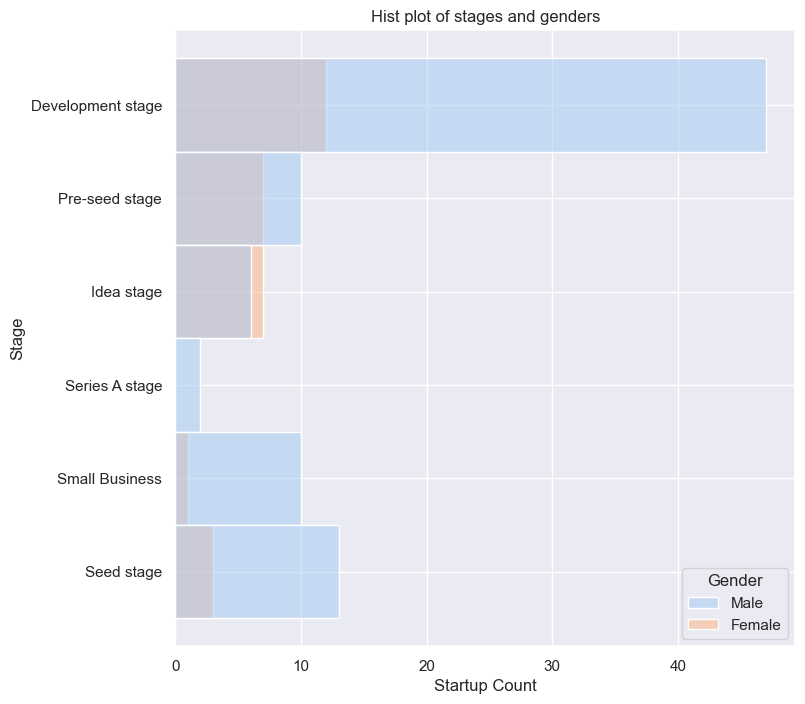

In [62]:
#Correlation between stage and gender features
sns.set(rc={'figure.figsize':(8,8)})
sns.histplot(data=df_startup,y="Stage",hue="Gender", palette="pastel")
plt. xlabel("Startup Count")
plt.title("Hist plot of stages and genders")
plt.show()

### According to this plot, we can say that stages are dominated by men mostly. Only in the idea stage, the concentration of women founders is higher than men founders.

In [63]:
#Checking the correlation between "Gender" and "Industry" features.
is_correlated("Gender","Industry")

p value is 0.8400551186522478 .It means there is no significant correlation between Gender and Industry features.


In [64]:
#Checking the correlation between "Gender" and "Type of product" features.
is_correlated("Gender","Type of product")

p value is 0.40831380706050713 .It means there is no significant correlation between Gender and Type of product features.


In [65]:
#Checking the correlation between "Gender" and "Role in the startup" features.
is_correlated("Gender","Role in the startup")

p value is 0.025431145967851544 .It means there is a significant correlation between Gender and Role in the startup features.


### There is a correlation!

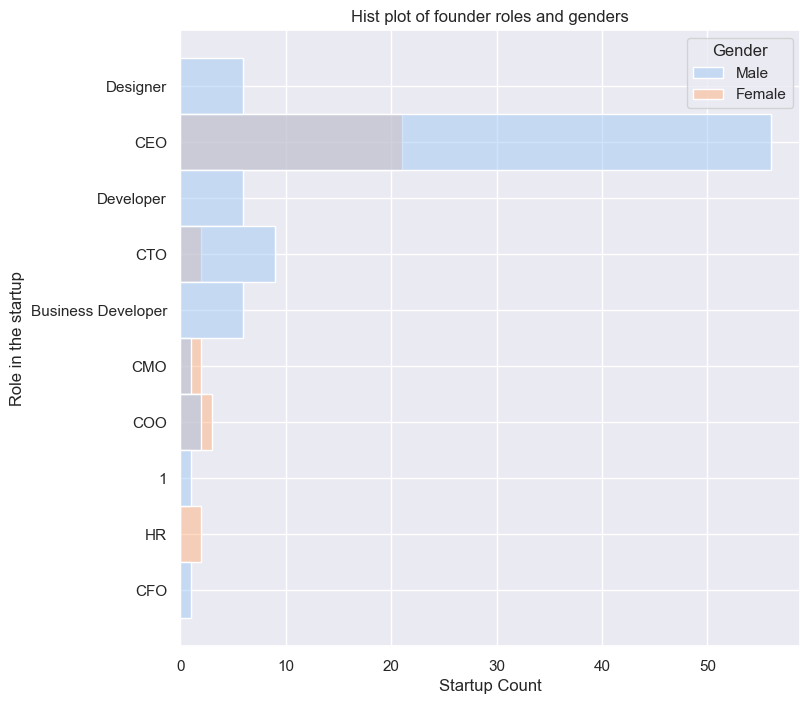

In [66]:
#Correlation between role in the startup and gender features
sns.set(rc={'figure.figsize':(8,8)})
sns.histplot(data=df_startup,y="Role in the startup",hue="Gender", palette="pastel")
plt. xlabel("Startup Count")
plt.title("Hist plot of founder roles and genders")
plt.show()

### Again, we can see that the concentration of men founders is higher than women founders in almost every role. But the CMO, COO and HR roles are exceptions.

## We can check every combination to see if there is a correlation between. These are the correlations that I've checked. After we find a correlation between some features, we can visualize them and see the correlation details clearly.

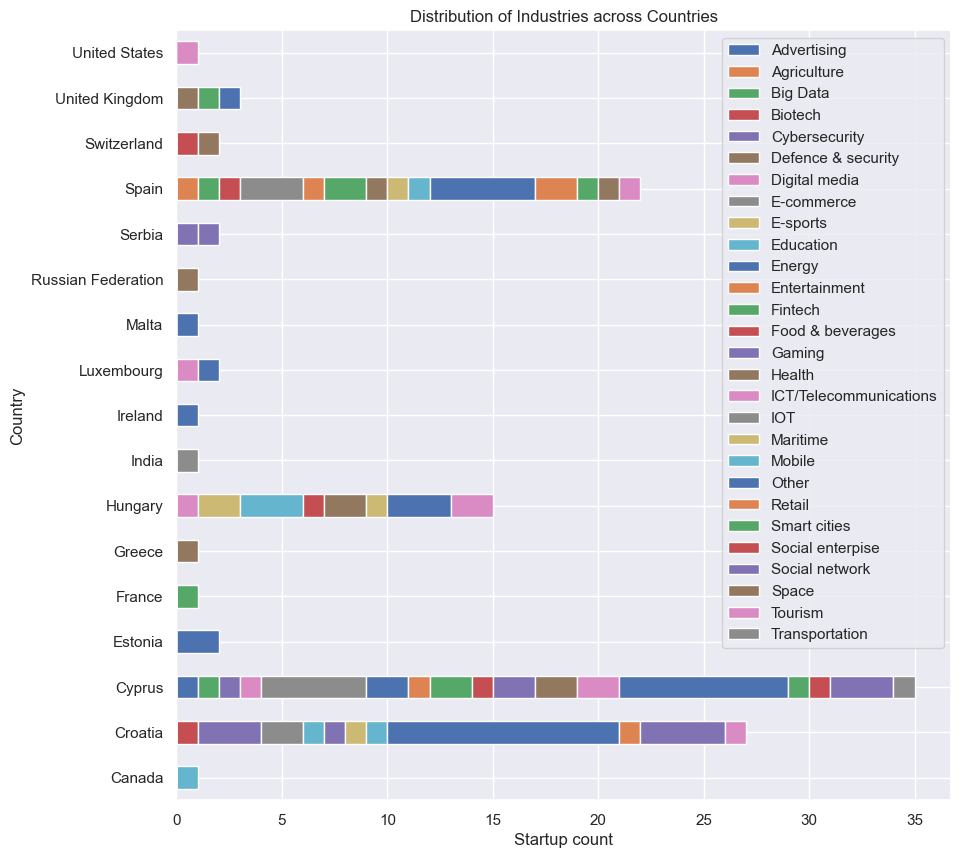

In [67]:

# Distribution of industries across countries.

industry_country = df_startup.groupby(['Country based in', 'Industry']).size().unstack()

sns.set(rc={'figure.figsize': (10,10)})
industry_country.plot(kind='barh', stacked=True)
plt.ylabel('Country')
plt.xlabel('Startup count')
plt.title('Distribution of Industries across Countries')
plt.legend(loc='upper right')
plt.show()


### In total, we can see Cyprus is the leader by far. But according to the "Other" industry Croatia is ahead. Cyprus has no e-sports or education. But in general Cyprus has the highest numbers of startups.

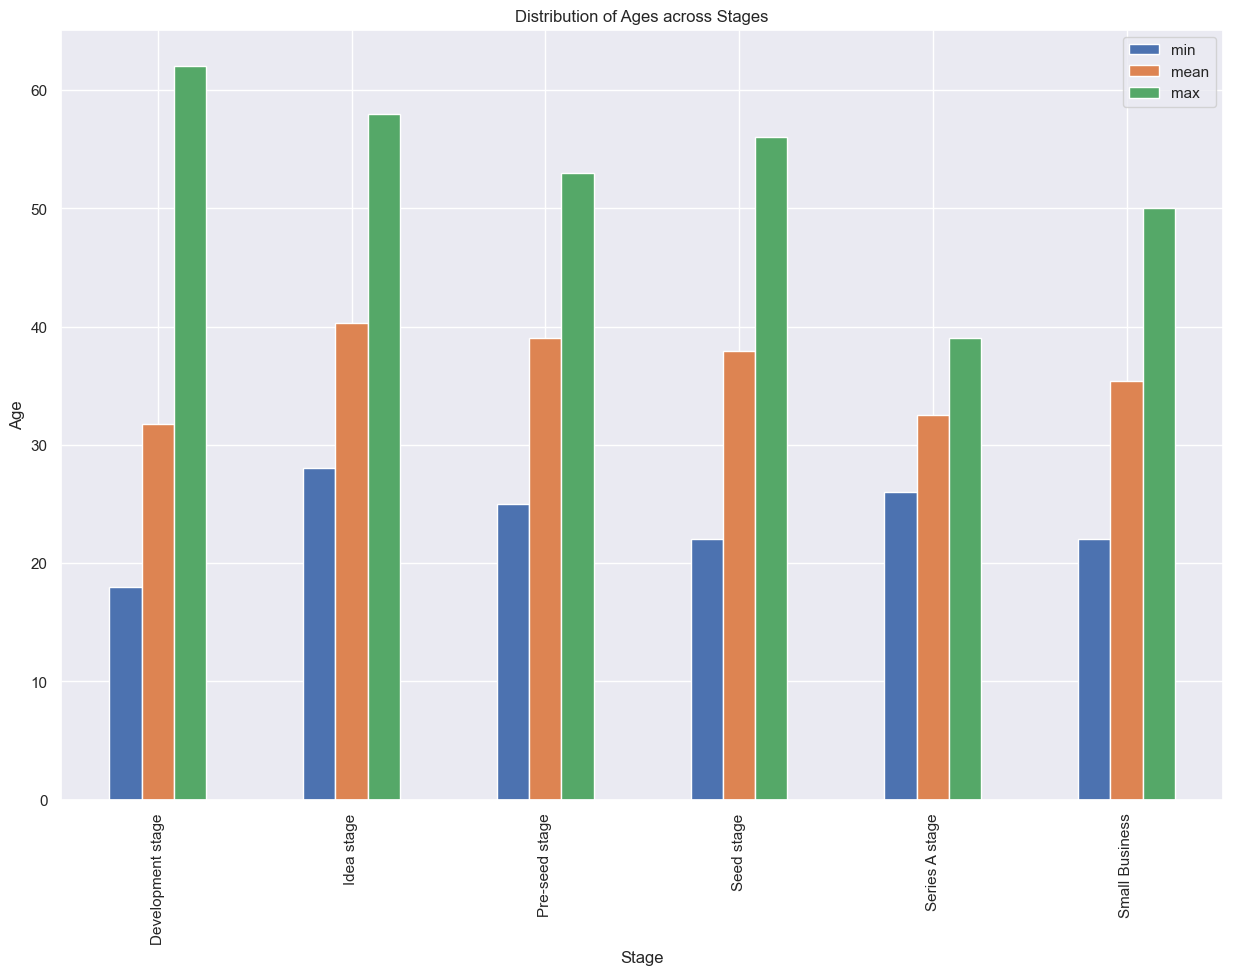

In [68]:
#Distribution of Ages across Stages
age_stage = df_startup.groupby(['Stage'])['Age'].agg(['min','mean','max'])
sns.set(rc={'figure.figsize': (15,10)})


age_stage.plot(kind='bar', stacked=False)
plt.xlabel('Stage')
plt.ylabel('Age')
plt.title('Distribution of Ages across Stages')
plt.show()


### We can see that the startup which's founder is the oldest is working on development stage, and the startup which's founder is the youngest is also working on development stage. If we look at the mean age, we can say that the youngest founders are in development stage. And again by reading mean value, we can see that the oldest founders are in idea stage.

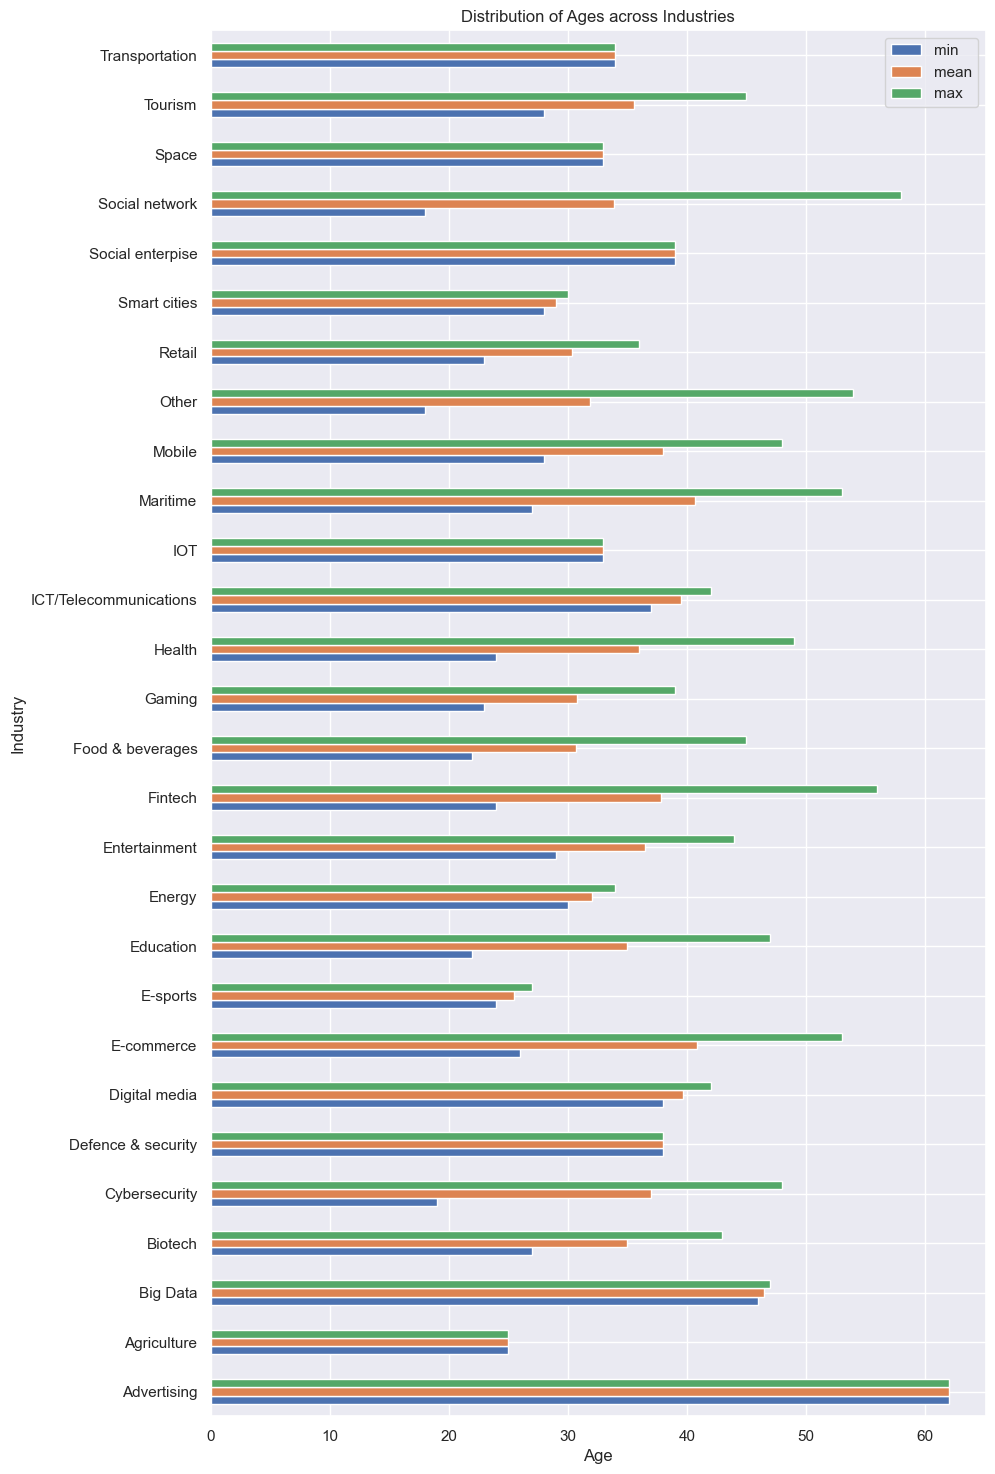

In [69]:
#Distribution of Ages across Industries
age_industry = df_startup.groupby(['Industry'])['Age'].agg(['min','mean','max'])
sns.set(rc={'figure.figsize': (10,18)})


age_industry.plot(kind='barh', stacked=False)
plt.ylabel('Industry')
plt.xlabel('Age')
plt.title('Distribution of Ages across Industries')           
plt.show()


### The advertising industry contains the oldest founder, social network and "other" industries contains the youngest founder. But in general according to mean age, the advertising industry containts the oldest founders, and the agriculture and e-sports industries contains the youngest founders.

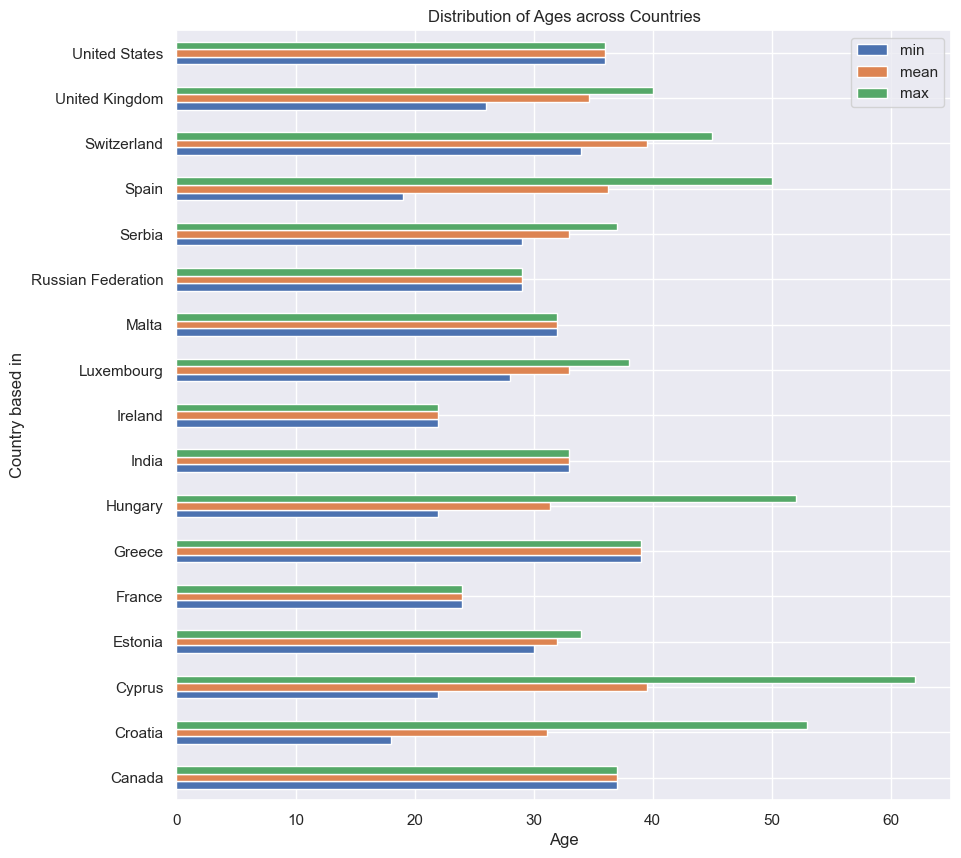

In [70]:
#Distribution of Ages across Countries
age_country = df_startup.groupby(['Country based in'])['Age'].agg(['min','mean','max'])
sns.set(rc={'figure.figsize': (10,10)})


age_country.plot(kind='barh', stacked=False)
plt.ylabel('Country based in')
plt.xlabel('Age')
plt.title('Distribution of Ages across Countries')
plt.show()


### We can see the oldest founder in Cyprus, and the youngest founder in Croatia.But if we look at the mean ages, Cyprus and Switzerland are the countries of oldest founders and Ireland is the country of the youngest founders.

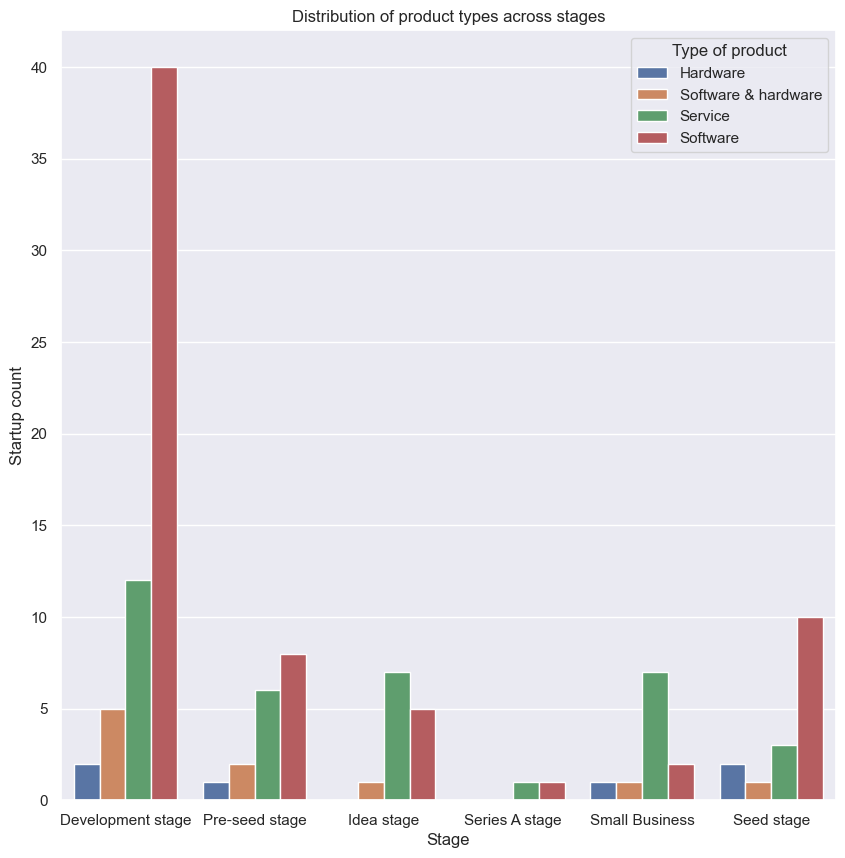

In [71]:
#Stages and type of product
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(data=df_startup,x="Stage",hue="Type of product")
plt.ylabel('Startup count')
plt.title('Distribution of product types across stages')
plt.show()


### As we can see from the plot, development stage holds the lead in each type of product. Except hardware, the differences are a lot big.

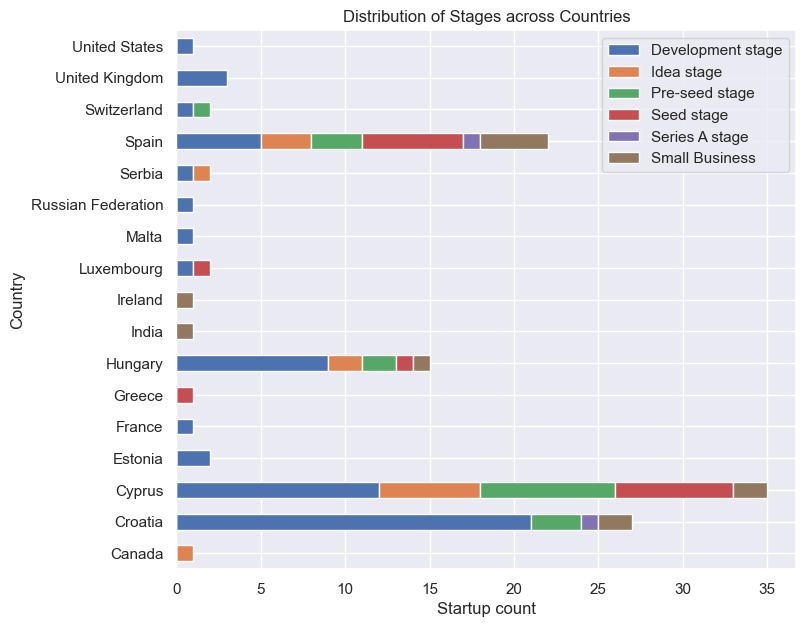

In [72]:
#Distribution of stages across countries.

stage_country = df_startup.groupby(['Country based in', 'Stage']).size().unstack()

sns.set(rc={'figure.figsize': (8,7)})
stage_country.plot(kind='barh', stacked=True)
plt.ylabel('Country')
plt.xlabel('Startup count')
plt.title('Distribution of Stages across Countries')
plt.legend(loc='upper right')
plt.show()


### Cyprus is holding the lead in idea stage and Cyprus has the most number of startups in total but we can see Croatia is holding the lead in development stage. Also Spain is holding the lead in small business

# THANKS A LOT !